<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1]:
import pandas as pd
import psycopg2
import warnings
warnings.filterwarnings('ignore')
import plotly
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python 

In [ ]:
# идентификация
DBNAME = 'project_sql'
USER = 
PASSWORD = 
HOST = 
PORT = 5432

In [4]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [5]:
# текст запроса
query_3_1 = f'''
select count(*) as count_vac
from vacancies
'''

In [6]:
# результат запроса
df1 = pd.read_sql_query(query_3_1,connection)
df1.iloc[0,0]

np.int64(49197)

2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [7]:
# текст запроса
query_3_2 = f'''
select count(id)
from employers
'''

In [8]:
# результат запроса
df2 = pd.read_sql_query(query_3_2,connection)
df2.iloc[0,0]

np.int64(23501)

3. Посчитате с помощью запроса количество регионов (таблица areas).

In [9]:
# текст запроса
query_3_3 = f'''
select count(*)
from areas
'''


In [10]:
# результат запроса
df3 = pd.read_sql_query(query_3_3,connection)
df3.iloc[0,0]

np.int64(1362)

4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [11]:
# текст запроса
query_3_4 = f'''
select count(*)
from industries
'''


In [12]:
# результат запроса
df4 = pd.read_sql_query(query_3_4,connection)
df4.iloc[0,0]

np.int64(294)

***

# выводы по предварительному анализу данных
Вакансий в два раза больше, чем число работодателей. Также я думаю, что таблица неполная, то есть срез данных.
Тем более на каждый регион в среднем по 36 вакансий. Надо исследовать более детально.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [13]:
# текст запроса
query_1_1 = f'''
select a.name,count(*) as cnt
from vacancies as v
left join areas as a ON a.id=v.area_id
group by v.area_id, a.name
order by 2 desc
'''

,name,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
5,Екатеринбург,1698
6,Нижний Новгород,1670
7,Казань,1415
8,Краснодар,1301
9,Самара,1144


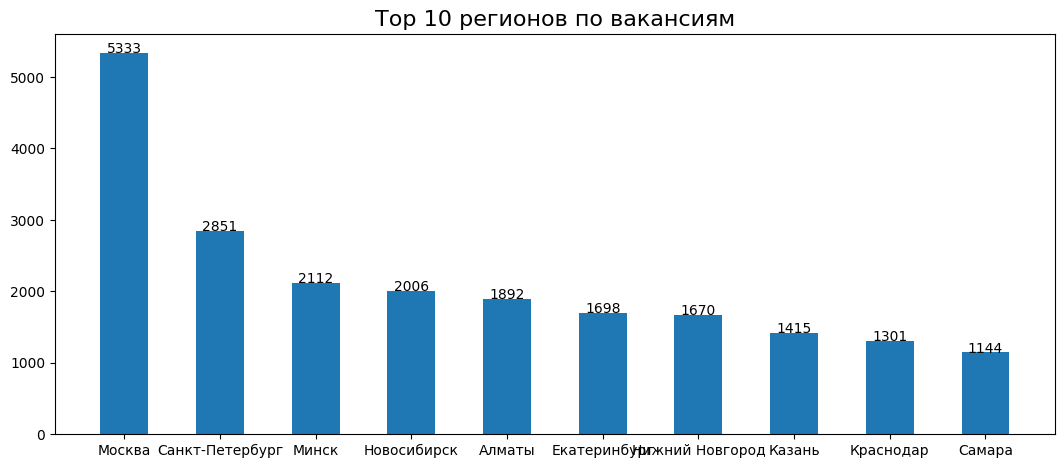

In [14]:
# результат запроса
df_1_1 = pd.read_sql_query(query_1_1,connection)
df_1_1 = df_1_1.nlargest(columns='cnt', n =10)
display(df_1_1)
fig = plt.figure(figsize=(10, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(
    x=df_1_1['name'],
    height = df_1_1['cnt'],
    width = 0.5
);
main_axes.set_title('Тор 10 регионов по вакансиям', fontsize=16)

for index, row in df_1_1.iterrows():

    main_axes.text(row.name,row.cnt, round(row.cnt,2), color='black', ha="center");

2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [15]:
# текст запроса
query_1_2 = f'''
select count(coalesce(salary_from, salary_to)) as salary
from vacancies as v
'''



In [16]:
# результат запроса
pd.read_sql_query(query_1_2,connection).iloc[0,0]

np.int64(24073)

3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [17]:
# текст запроса
query_1_3 = """
select avg(salary_from)::int as minimum,
avg(salary_to)::int as maximum
from vacancies as v
"""

In [18]:
# результат запроса
pd.read_sql_query(query_1_3,connection)

,minimum,maximum
0,71065,110537


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [19]:
# текст запроса
query_1_4 = """select schedule, employment, count(*) as cnt
from vacancies as v
group by schedule, employment
order by 3 desc"""

,schedule,employment,cnt
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


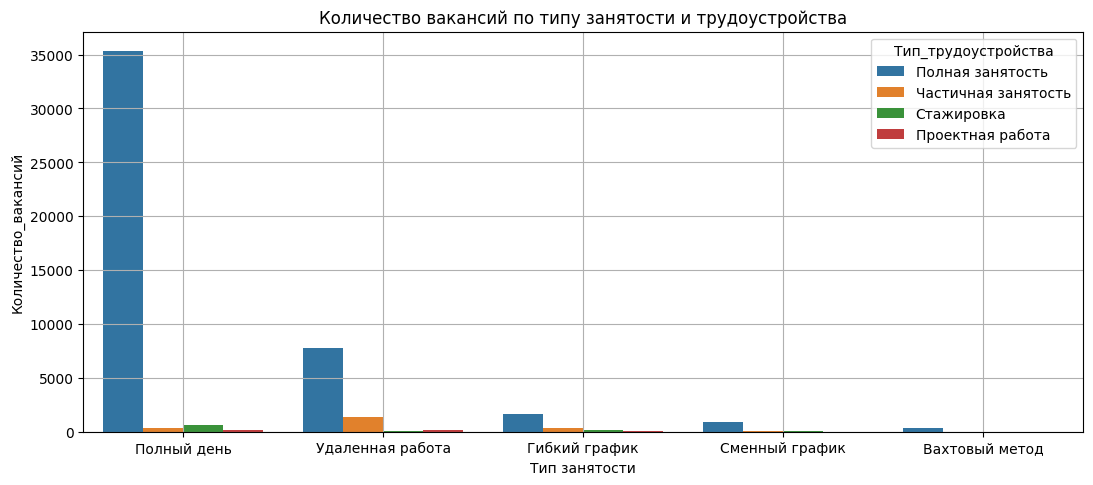

In [20]:
# результат запроса
df14 = pd.read_sql_query(query_1_4, connection)
display(df14)

df14.columns = ['Тип_графика','Тип_трудоустройства', 'Количество_вакансий']
fig = plt.figure(figsize=(10, 4))
bar = fig.add_axes([0, 0, 1, 1])

bar = sns.barplot(df14,
        x = 'Тип_графика',
        y = 'Количество_вакансий',
        hue = 'Тип_трудоустройства'    
)

bar.set_title('Количество вакансий по типу занятости и трудоустройства')
bar.grid()
bar.set_xlabel('Тип занятости');

5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [21]:
# текст запроса
query_1_5 = """select experience, count(*) as cnt
from vacancies as v
group by experience
order by 2"""

,experience,cnt
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


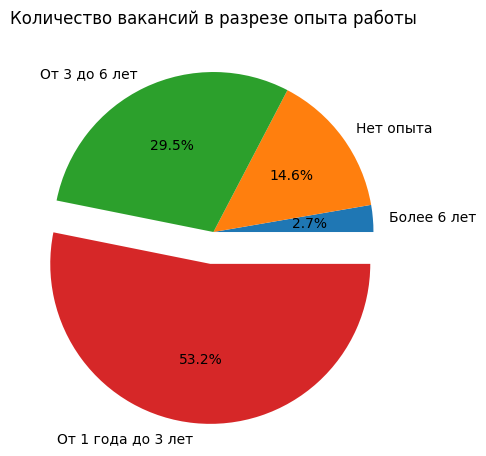

In [22]:
# результат запроса
df_1_5 = pd.read_sql_query(query_1_5, connection)
display(df_1_5)

fig = plt.figure(figsize=(13, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    df_1_5['cnt'],
    labels = df_1_5['experience'],
    autopct = '%.1f%%',
    explode = [0, 0, 0, 0.2]
)
axes.set_title('Количество вакансий в разрезе опыта работы');


***

# выводы по детальному анализу вакансий
Половина вакансий без указания зарплаты. Полная занятость лидирует в каждом типе трудоустройства. Наиболее популярные вакансии с опытом работы от 1 до 3 лет. Также работодатели предпочитают полный рабочий день.

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [23]:
# текст запроса
query_5_1 = """
select e.name, count(*) as cnt
from vacancies as v
left join employers as e ON e.id = v.employer_id
group by v.employer_id,e.name
order by 2 desc"""

In [24]:
# результат запроса
pd.read_sql_query(query_5_1, connection).iloc[[0,4],:]

,name,cnt
0,Яндекс,1933
4,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [25]:
# текст запроса
query_5_2 = '''select a.name, count(distinct e.id) as cnt_eml, count(v.id) as cnt_v
from areas as a
left join vacancies as v ON v.area_id = a.id
left join employers as e ON a.id = e.area
group by a.id, a.name
order by 3, 2 desc'''

In [26]:
# результат запроса
pd.read_sql_query(query_5_2, connection).iloc[0,:]

name       Россия
cnt_eml       410
cnt_v           0
Name: 0, dtype: object

3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [27]:
# текст запроса
query_5_3 = '''select e.name, count(distinct v.area_id) as cnt_reg
from  vacancies as v 
left join employers as e ON v.employer_id = e.id
group by e.id, e.name
order by 2 desc'''

In [28]:
# результат запроса
df_5_3 = pd.read_sql_query(query_5_3, connection)
display(df_5_3)

fig = px.treemap(
    data_frame = df_5_3.nlargest(columns='cnt_reg', n = 20), 
    path=['name'], 
    values='cnt_reg', 
    height=500, #высота
    width=1000, #ширина
    title='Топ 20 компаний по количеству регионов'
)

#отображаем график
fig.show()

,name,cnt_reg
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14901,НПП Авиатрон,1
14902,Центр дистанционных торгов,1
14903,Городские Телекоммуникационные Системы,1
14904,"Введенский, Отель",1


<img width='100%' src='newplot1.png'>

4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [29]:
# текст запроса
query_5_4 = '''select count(distinct e.id)
from employers as e 
left join employers_industries as i ON e.id = i.employer_id
left join industries as ii ON ii.id = i.industry_id 
where ii.name is null'''

In [30]:
# результат запроса
pd.read_sql_query(query_5_4, connection).iloc[0,:]

count    8419
Name: 0, dtype: int64

5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [31]:
# текст запроса
query_5_5 = '''select e.name, count(i.industry_id) cnt_ind
from employers as e 
left join employers_industries as i ON e.id = i.employer_id
left join industries as ii ON ii.id = i.industry_id 
group by e.id, e.name
having count(i.industry_id) = 4
order by 1
offset 2 limit 1'''

In [32]:
# результат запроса
pd.read_sql_query(query_5_5, connection).iloc[0,:]

name       2ГИС
cnt_ind       4
Name: 0, dtype: object

6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [33]:
# текст запроса
query_5_6 ="""select count(distinct e.id) cnt_ind
from employers as e 
left join employers_industries as i ON e.id = i.employer_id
left join industries as ii ON ii.id = i.industry_id 
where ii.name = 'Разработка программного обеспечения' """

In [34]:
# результат запроса
pd.read_sql_query(query_5_6, connection)

,cnt_ind
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [35]:
# код для получения списка городов-милионников
import requests # Импортируем библиотеку requests
from pprint import pprint
from bs4 import BeautifulSoup

url = r'https://ru.wikipedia.org/wiki/Города-миллионеры_России' # Определяем значение URL страницы для запроса
response = requests.get(url) # Делаем GET-запрос к ресурсу и результат ответа сохраняем в переменной response
page = BeautifulSoup(response.text, 'html.parser')
#res


mill = []
page2 = page.select('td > a')

for i in page2:
    if len(mill) < 16:
        mill.append(i.text)

mill = tuple(mill)



In [36]:
# текст запроса
query_7 = f'''select a.name, count(v.id) as cnt_vac
from vacancies as v
join employers as e ON e.id = v.employer_id
join areas as a ON a.id = v.area_id
where e.name = 'Яндекс' and a.name in {mill}
group by a.id,a.name

union all

select 'Total', count(v.id) as cnt_vac
from vacancies as v
join employers as e ON e.id = v.employer_id
join areas as a ON a.id = v.area_id
where e.name = 'Яндекс' and a.name in {mill}
order by 2
'''


In [37]:
# результат запроса
df_7 = pd.read_sql_query(query_7, connection)
display(df_7)

fig = px.treemap(
    data_frame = df_7[df_7['name'] !='Total'],
    path=['name'], 
    values='cnt_vac', 
    height=500, #высота
    width=1000, #ширина
    title='Вакансии Яндекса по регионам'
)

#отображаем график
fig.show()

,name,cnt_vac
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Самара,26
8,Уфа,26
9,Краснодар,30


<img width='100%' src='newplot2.png'>

***

# выводы по анализу работодателей
Компания "Яндекс" более распространена по РФ. 8419 - работодателей без сфер деятельности. Половина вакансий без указания по зарплате. Средняя залплата от 71 - 110 тысяч. 7% вакансий - разработка. Чем крупнее город, тем больше вакансий от работодателей.

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [38]:
# текст запроса
query_6_1 = '''
select count(*)
from vacancies
where lower(name) like '%data%' or lower(name) like '%данн%' '''

In [39]:
# результат запроса
pd.read_sql_query(query_6_1, connection)

,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [40]:
# текст запроса
query1 = '''select count(*)
from vacancies
where
(
    name ilike '%junior%'
    or employment = 'Стажировка'
    or experience = 'Нет опыта'
) 
and 
(
    name ilike '%data scientist%' 
    or name ilike '%data science%'
    or name ilike '%исследователь данных%'
    or name ilike '%ML%'
    or name ilike '%machine learning%'
    or name ilike '%машинн%обучен%'

) and name not ilike '%html%' '''

In [41]:
# результат запроса
pd.read_sql_query(query1, connection)

,count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [42]:
# текст запроса
query2 = '''
select count(*)
from vacancies
where

(
    name ilike '%data scientist%' 
    or name ilike '%data science%'
    or name ilike '%исследователь данных%'
    or name ilike '%ML%'
    or name ilike '%machine learning%'
    or name ilike '%машинн%обучен%'
)
AND name not ilike '%html%'
AND
(
    key_skills ILIKE '%SQL%' 
    OR key_skills ILIKE '%postgres%'
)
'''

In [43]:
# результат запроса
pd.read_sql_query(query2, connection)

,count
0,229


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [44]:
# текст запроса
query3 = '''
select count(*)
from vacancies
where

(
    name ilike '%data scientist%' 
    or name ilike '%data science%'
    or name ilike '%исследователь данных%'
    or name ilike '%ML%'
    or name ilike '%machine learning%'
    or name ilike '%машинн%обучен%'
)
AND name not ilike '%html%'
AND

  key_skills ILIKE '%python%' 
  
'''


In [45]:
# результат запроса
pd.read_sql_query(query3, connection)

,count
0,357


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [46]:
# текст запроса
query4 = '''
select
round(avg(length(key_skills)- length(replace(key_skills,chr(9),'')) + 1),2) as cnt
from vacancies
where

(
    name ilike '%data scientist%' 
    or name ilike '%data science%'
    or name ilike '%исследователь данных%'
    or name ilike '%machine learning%'
    or name ilike '%машинн%обучен%'
    or name ilike '%ML%'
)
AND name NOT ILIKE '%HTML%'
and key_skills is not null
'''

In [47]:
# результат запроса
pd.read_sql_query(query4, connection)

,cnt
0,6.55


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [48]:
# текст запроса
query5 = '''select
experience, 
round(avg(coalesce((salary_from + salary_to)/2, salary_from, salary_to))) as avg_salary
from vacancies
where

(
    name ilike '%data scientist%' 
    or name ilike '%data science%'
    or name ilike '%исследователь данных%'
    or name ilike '%machine learning%'
    or name ilike '%машинн%обучен%'
    or name like '%ML%'
  
)
AND name not ilike '%HTML%'
group by experience
'''

In [49]:
# результат запроса
pd.read_sql_query(query5, connection)

,experience,avg_salary
0,Более 6 лет,NaN
1,Нет опыта,74643.0
2,От 1 года до 3 лет,139675.0
3,От 3 до 6 лет,243115.0


***

# выводы по предметному анализу
Вакансий DS - 357, для джунов 51 (это примерно 14%). Всех вакансий - 49197, значит доля вакансий DS = 0,73%, для работы на этой позиции в среднем необходимо около 7 разных навыков. Чем больше опыт, тем больше доход по DS. Но обратите внимание, что сумма дохода при опыте более 6 лет не указана

# Общий вывод по проекту

In [50]:
# подведем итог исследования, обобщите выводы
# здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования

In [51]:
# Всего вакансий в DS
query6 = '''
select count(*)
from vacancies
where

(
    name ilike '%data scientist%' 
    or name ilike '%data science%'
    or name ilike '%исследователь данных%'
    or name ilike '%ML%'
    or name ilike '%machine learning%'
    or name ilike '%машинн%обучен%'
)
AND name not ilike '%html%'
AND

  key_skills ILIKE '%python%' 
  
'''
print(pd.read_sql_query(query6, connection), ' - Вакансий DS')

   count
0    357  - Вакансий DS


,Skill,Count
0,Python,354
1,SQL,208
7,Machine Learning,114
9,Git,81
51,Математическая статистика,62
65,Data Analysis,55
20,Linux,53
78,Data Science,52
97,Pandas,52
4,ML,49


529  - всего разных навыков


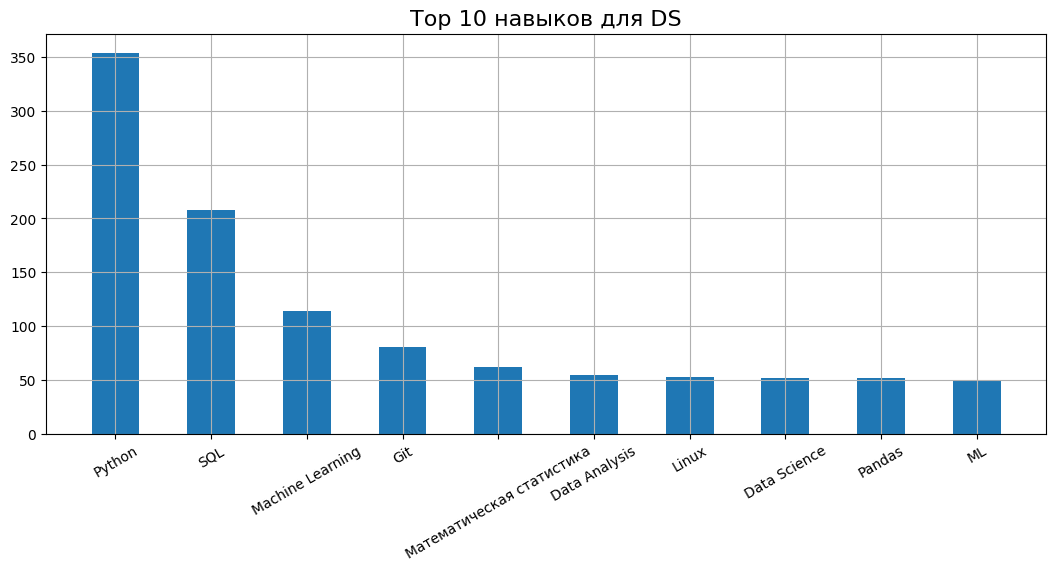

In [52]:
# Получим полный список оличества навыков DS и посмотрим какой навык преобладет
query7 = '''
select
replace(key_skills,chr(9),' -//- ') as cnt
from vacancies
where

(
    name ilike '%data scientist%' 
    or name ilike '%data science%'
    or name ilike '%исследователь данных%'
    or name ilike '%machine learning%'
    or name ilike '%машинн%обучен%'
    or name ilike '%ML%'
)
AND name NOT ILIKE '%HTML%'
and key_skills is not null '''

df_keys = pd.read_sql_query(query7, connection)
ds_skills = {} # словарь с навыками
temp = []

for skills in df_keys['cnt']:
    
    # добавляем навыки в словарь
    temp = skills.split(' -//- ')
   
    for skill in temp:
        if skill not in ds_skills:
            ds_skills[skill] = 1
        else: 
            ds_skills[skill] +=1

df_skills = pd.DataFrame(ds_skills.items(), columns = ['Skill', 'Count'])
df_skills_10 = df_skills.sort_values(by='Count').nlargest(n = 10, columns = 'Count')
display(df_skills_10)
print(len(ds_skills.keys()), ' - всего разных навыков')

# Строим график
fig = plt.figure(figsize=(10, 4))
main_axes = fig.add_axes([0, 0, 1, 1])

main_axes.bar(
    x = df_skills_10['Skill'],
    height = df_skills_10['Count'],
    width = 0.5
)
main_axes.set_title('Тор 10 навыков для DS', fontsize=16)
main_axes.xaxis.set_tick_params(rotation=30)
main_axes.grid();


# Вывод:

* Можно посмотреть топ - 5/10 работодателей по количеству вакансий, а также в разрезе городов, чтобы увидеть, где какой работодатель преобладает. /
* Компания «Яндекс» - самый крупный работодатель по числу вакансий. Необходимо изучить сферы деятельности и предлагаемые вакансии этой компании, а также 
посмотреть на распространённость по городам России.
* Возможно стоит посмотреть, есть ли интересные вакансии в более маленьких городах и от каких работодателей.
* Каких вакансий больше всего?